# Problem Statement:

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Data Dictionary:

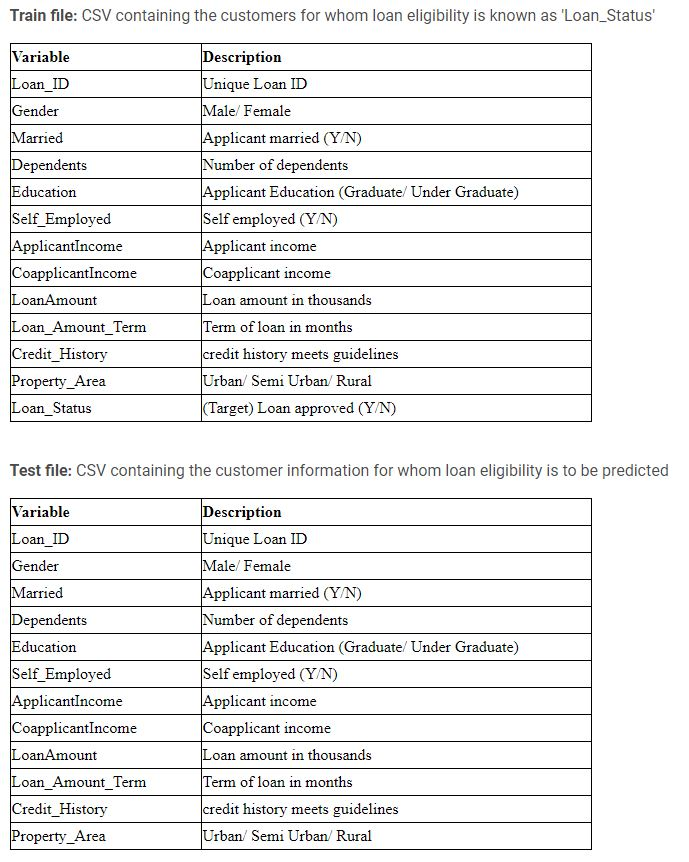

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading csv files

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### EDA 

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### Visualization

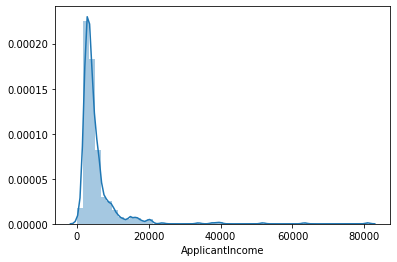

In [14]:
sns.distplot(train['ApplicantIncome'])

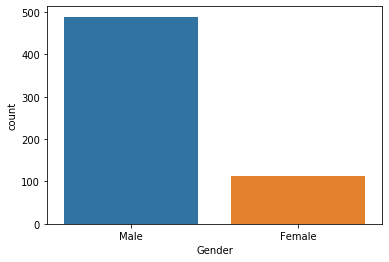

In [15]:
sns.countplot(train['Gender'])

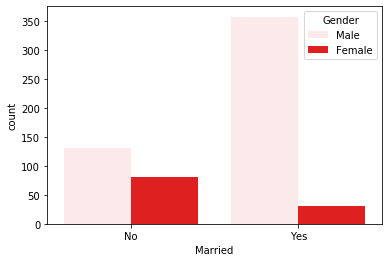

In [16]:
sns.countplot(train['Married'], hue=train['Gender'], color='red')

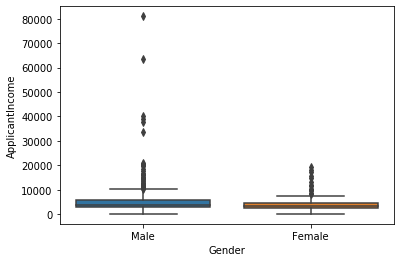

In [18]:
sns.boxplot(x='Gender',y='ApplicantIncome', data=train)

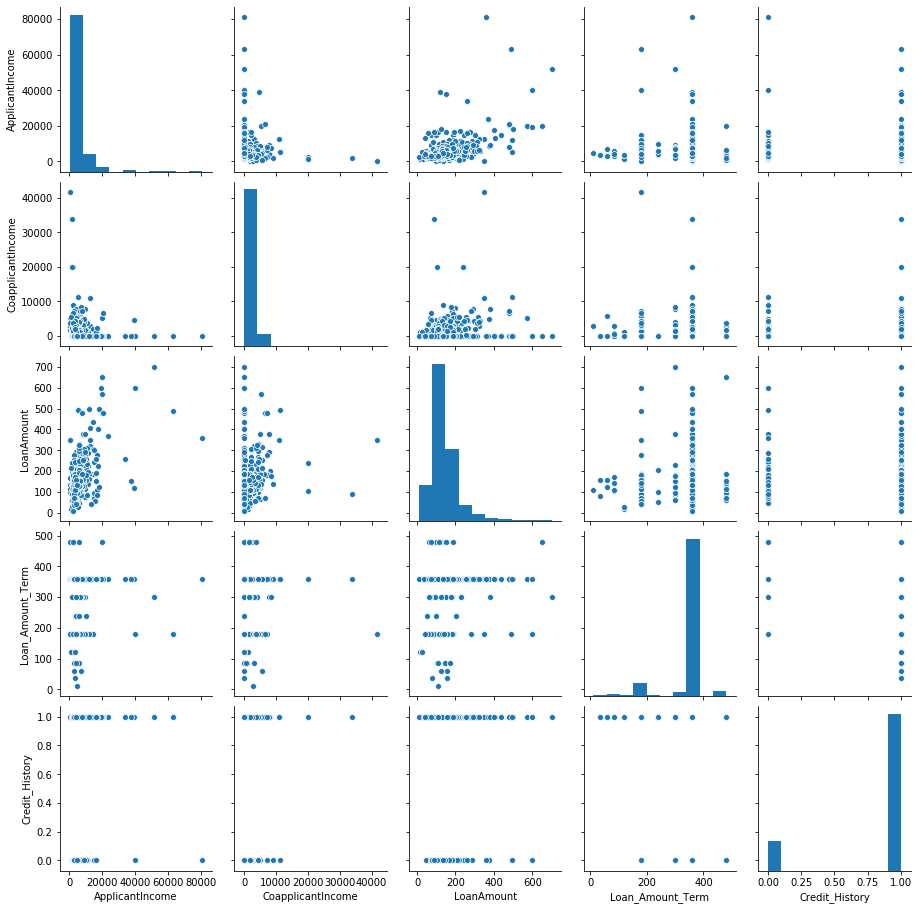

In [19]:
sns.pairplot(train)

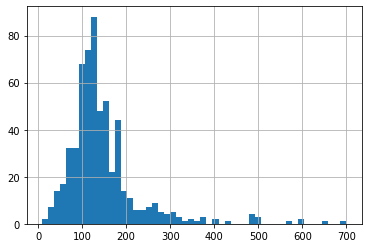

In [20]:
train['LoanAmount'].hist(bins=50)

### Data Cleaning : Handling Null Values 

In [22]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
# Gender of loan applicants

train['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [24]:
# 79% of the applicants are Males

len(train[train['Gender']=='Male'])/len(train['Gender']) * 100

79.64169381107492

In [25]:
# Imputing the NA values in Gender with Male

train['Gender']=train['Gender'].fillna('Male')

In [26]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# Most of the loan applicants are found to be married

train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [28]:
# Imputing the NA values in Married column with Yes

train['Married']=train['Married'].fillna('Yes')

In [29]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
# Large number of the loan applicants are not found to be self-employed

train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [31]:
# Imputing the NA values in the Self_Employed column with No

train['Self_Employed']=train['Self_Employed'].fillna('No')

In [32]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
# Mapped the dependents using a Dictionary

train.Dependents=train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [34]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
# Still 15 NA values are present in the Dependents column

train['Dependents'].isnull().sum()

15

In [36]:
# Imputed these NA values with 0 as this is the most frequent category

train['Dependents']=train['Dependents'].fillna(0)

In [37]:
train['Dependents'].isnull().sum()

0

In [38]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# The NA values in the Loan Amount column have been imputed using the column Mean

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())

In [40]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# Credit history is 1.0 is applicable to most of our applicants

train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [42]:
# Imputed NA values in the Credit_History column with 1.0

train['Credit_History']=train['Credit_History'].fillna(1.0)

In [43]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
# The most frequent loan amount term asked is 360.0

train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [45]:
# Imputed 360.0 for the NA values in the Loan Amount Term

train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(360.0)

In [46]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [48]:
# Creating a column called Total Income
# Adding up the Applicant and Co-applicants income

train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [49]:
train.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [50]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


In [51]:
train.drop('Loan_ID', axis=1, inplace=True)

In [52]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0.0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


In [53]:
# Performing Label encoding on Gender, Married, Education, Self Employed, Property area and loan status

from sklearn.preprocessing import LabelEncoder
var_col = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_col:
    train[i] = le.fit_transform(train[i])

In [54]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0.0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1.0,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0.0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0.0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0.0,0,0,141.000000,360.0,1.0,2,1,6000.0


### Model Development
   **on Training Dataset**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [56]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome'],
      dtype='object')

In [57]:
X = train.loc[:, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome']]

In [58]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0.0,0,0,146.412162,360.0,1.0,2,5849.0
1,1,1,1.0,0,0,128.000000,360.0,1.0,0,6091.0
2,1,1,0.0,0,1,66.000000,360.0,1.0,2,3000.0
3,1,1,0.0,1,0,120.000000,360.0,1.0,2,4941.0
4,1,0,0.0,0,0,141.000000,360.0,1.0,2,6000.0


In [59]:
y = train.loc[:, ['Loan_Status']]

In [60]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [62]:
# Using Logistic Regression for the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [92]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test) *100)

Logistic Regression accuracy =  82.70270270270271


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_test      Loan_Status
454            1
52             0
536            1
469            0
55             1
..           ...
242            1
515            1
582            1
225            0
134            1

[185 rows x 1 columns]


### Using Test Dataset
**To test our model, firstly we would clean the test dataset like the way we did for training dataset**

In [65]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [66]:
# Dropping Loan ID column

test.drop('Loan_ID', axis=1, inplace=True)

In [67]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [68]:
# Percentage of Male applicants is higher therefore will impute in similar manner

test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [69]:
test['Gender'] = test['Gender'].fillna('Male')

In [70]:
test.isnull().sum()

Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [71]:
# Mapping the Dependents using a Dictionary

test.Dependents=test.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [72]:
test['Dependents'].isnull().sum()

10

In [73]:
# Filling null values in Dependents with 0

test['Dependents']=test['Dependents'].fillna(0)

In [74]:
test.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [75]:
# Not so many Self employed applicants. Will impute No inplace of NAs.

test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [76]:
test['Self_Employed'] = test['Self_Employed'].fillna('No')

In [77]:
test.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [78]:
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(360.0)

In [79]:
# New column created as Total Income adding up Applicant and Coapplicants Incomes

test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [80]:
# Dropping up Applicant and Coapplicants Income columns

test.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [81]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount           5
Loan_Amount_Term     0
Credit_History      29
Property_Area        0
TotalIncome          0
dtype: int64

In [82]:
# Credit History Imputed with the most frequent item

test['Credit_History']=test['Credit_History'].fillna(1.0)

In [83]:
# Imputed Loan Amount NA values with the Mean of the Column

test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

In [84]:
test.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
TotalIncome         0
dtype: int64

In [85]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,Male,Yes,0.0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1.0,Graduate,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2.0,Graduate,No,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2.0,Graduate,No,100.0,360.0,1.0,Urban,4886
4,Male,No,0.0,Not Graduate,No,78.0,360.0,1.0,Urban,3276


In [86]:
# Performing label encoding on specific columns

from sklearn.preprocessing import LabelEncoder
var_col = ['Gender','Married','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_col:
    test[i] = le.fit_transform(test[i])

In [87]:
# Test Dataset is now ready to get feeded into our Model for predictions

test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0.0,0,0,110.0,360.0,1.0,2,5720
1,1,1,1.0,0,0,126.0,360.0,1.0,2,4576
2,1,1,2.0,0,0,208.0,360.0,1.0,2,6800
3,1,1,2.0,0,0,100.0,360.0,1.0,2,4886
4,1,0,0.0,1,0,78.0,360.0,1.0,2,3276


### Predictions

In [88]:
lr_prediction1 = model.predict(test)

In [89]:
lr_prediction1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [90]:
output = pd.DataFrame({'Loan_Status': lr_prediction1})
output.to_csv('my_submission_av.csv', index=False)